In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def analyze_csv(J, K, p, csv_path=None):
    """
    Read simulation results from the CSV file for matrices of size J x K and probability p,
    aggregate the average runtime and average proportion identifiable across seeds,
    and plot the branches distribution.

    Parameters:
      J (int): Number of rows.
      K (int): Number of columns.
      p (float): Bernoulli probability used in simulation.
      csv_path (str): Optional path to the CSV file. If not provided, uses
                      "data/runtime_expr_results_J{J}_K{K}.csv".

    Returns:
      dict: A dictionary containing overall average runtime, average prop_identifiable,
            and the average branch distribution (as a dict).
    """
    if csv_path is None:
        csv_path = f"idQ_expr_J{J}_K{K}_p{p}.csv"
    # Read the CSV file into a DataFrame.
    df = pd.read_csv(csv_path)
    
    # If the CSV contains rows with different p values, filter for our specified p.
    df = df[df['p'] == p]
    
    # Compute overall average runtime and prop_identifiable across seeds.
    avg_runtime = df['avg_runtime'].mean()
    avg_prop_identifiable = df['prop_identifiable'].mean()
    
    # The CSV includes separate branch count columns: 'branch_-1', 'branch_0', ..., 'branch_6'.
    branch_cols = [f'branch_{i}' for i in [-1, 0, 1, 2, 3, 4, 5, 6]]
    branch_distribution = df[branch_cols].mean()  # Average count for each branch across seeds

    # Plot the branch distribution as a bar chart.
    plt.figure(figsize=(8, 4))
    branch_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Branch')
    plt.ylabel('Average Count per Seed')
    plt.title(f'Branch Distribution for J={J}, K={K}, p={p}')
    plt.tight_layout()
    plt.show()

    # Return results as a dictionary.
    return {
        'avg_runtime': avg_runtime,
        'avg_prop_identifiable': avg_prop_identifiable,
        'branch_distribution': branch_distribution.to_dict()
    }


In [2]:
J = 50
K = 15
p = 0.2

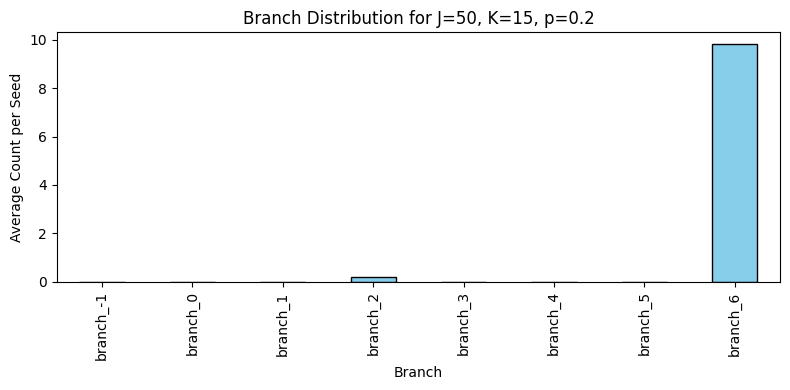

{'avg_runtime': 225.5603434169686,
 'avg_prop_identifiable': 0.982,
 'branch_distribution': {'branch_-1': 0.0,
  'branch_0': 0.0,
  'branch_1': 0.0,
  'branch_2': 0.18,
  'branch_3': 0.0,
  'branch_4': 0.0,
  'branch_5': 0.0,
  'branch_6': 9.82}}

In [3]:
analyze_csv(J, K, p)

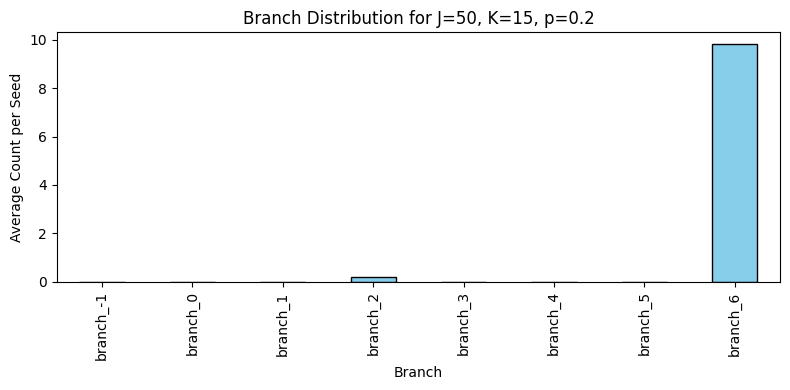

{'avg_runtime': 162.53155721830763,
 'avg_prop_identifiable': 0.982,
 'branch_distribution': {'branch_-1': 0.0,
  'branch_0': 0.0,
  'branch_1': 0.0,
  'branch_2': 0.18,
  'branch_3': 0.0,
  'branch_4': 0.0,
  'branch_5': 0.0,
  'branch_6': 9.82}}

In [7]:
analyze_csv(J, K, p)

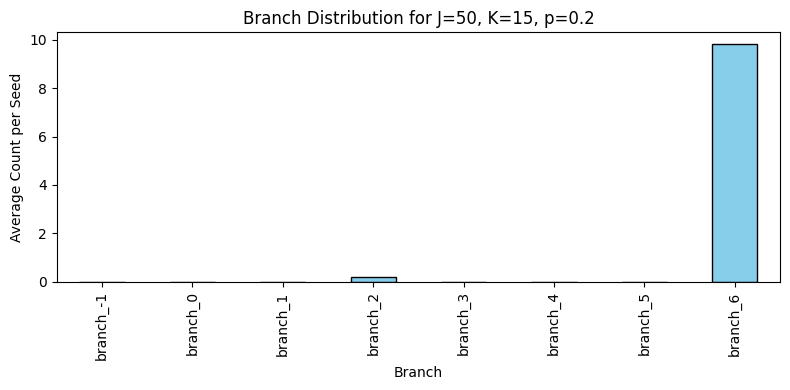

{'avg_runtime': 92.45360555250993,
 'avg_prop_identifiable': 0.9820000000000002,
 'branch_distribution': {'branch_-1': 0.0,
  'branch_0': 0.0,
  'branch_1': 0.0,
  'branch_2': 0.18,
  'branch_3': 0.0,
  'branch_4': 0.0,
  'branch_5': 0.0,
  'branch_6': 9.82}}

In [9]:
analyze_csv(J, K, p)

In [10]:
# Read the CSV file into a DataFrame.
df_v0 = pd.read_csv(f"idQ_expr_J{J}_K{K}_p{p}.csv")
df_v1 = pd.read_csv(f"idQ_expr_J{J}_K{K}_p{p}_v0.csv")

In [11]:
import pandas as pd

# 1) Merge the two DataFrames on seed, adding suffixes so you can see v0 vs v1
df_v01 = pd.merge(df_v0, df_v1, on='seed', suffixes=('_v0','_v1'))

# 2) For every other column, compute a “diff” column = v1 − v0
for col in df_v0.columns:
    if col == 'seed': 
        continue
    df_v01[f'{col}_diff'] = df_v01[f'{col}_v1'] - df_v01[f'{col}_v0']

# Now df contains columns like: seed, X_v0, X_v1, X_diff, Y_v0, Y_v1, Y_diff, …
print(df_v01.head())


   J_v0  K_v0  N_v0  p_v0  seed  avg_runtime_v0  prop_identifiable_v0  \
0    50    15    10   0.2    80      156.770171                   0.9   
1    50    15    10   0.2     5      176.553483                   0.9   
2    50    15    10   0.2    37      173.593346                   0.9   
3    50    15    10   0.2    53      172.716578                   0.9   
4    50    15    10   0.2    28      176.051314                   0.9   

   branch_-1_v0  branch_0_v0  branch_1_v0  ...  avg_runtime_diff  \
0             0            0            0  ...        -54.626594   
1             0            0            0  ...        -32.884144   
2             0            0            0  ...        -69.438010   
3             0            0            0  ...        -46.291015   
4             0            0            0  ...         22.923813   

   prop_identifiable_diff  branch_-1_diff  branch_0_diff  branch_1_diff  \
0                     0.0               0              0              0   
1 

In [12]:
df_v01

,J_v0,K_v0,N_v0,p_v0,seed,avg_runtime_v0,prop_identifiable_v0,branch_-1_v0,branch_0_v0,branch_1_v0,...,avg_runtime_diff,prop_identifiable_diff,branch_-1_diff,branch_0_diff,branch_1_diff,branch_2_diff,branch_3_diff,branch_4_diff,branch_5_diff,branch_6_diff
0,50,15,10,0.2,80,156.770171,0.9,0,0,0,...,-54.626594,0.0,0,0,0,0,0,0,0,0
1,50,15,10,0.2,5,176.553483,0.9,0,0,0,...,-32.884144,0.0,0,0,0,0,0,0,0,0
2,50,15,10,0.2,37,173.593346,0.9,0,0,0,...,-69.438010,0.0,0,0,0,0,0,0,0,0
3,50,15,10,0.2,53,172.716578,0.9,0,0,0,...,-46.291015,0.0,0,0,0,0,0,0,0,0
4,50,15,10,0.2,28,176.051314,0.9,0,0,0,...,22.923813,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,50,15,10,0.2,38,331.557932,1.0,0,0,0,...,-197.340089,0.0,0,0,0,0,0,0,0,0
96,50,15,10,0.2,45,354.573443,1.0,0,0,0,...,48.536727,0.0,0,0,0,0,0,0,0,0
97,50,15,10,0.2,24,417.272413,1.0,0,0,0,...,-40.199692,0.0,0,0,0,0,0,0,0,0
98,50,15,10,0.2,94,429.990765,1.0,0,0,0,...,-158.213054,0.0,0,0,0,0,0,0,0,0


In [13]:
any(df_v01["avg_runtime_diff"] < 0)

True

In [14]:
any(df_v01["prop_identifiable_diff"] > 0)

False

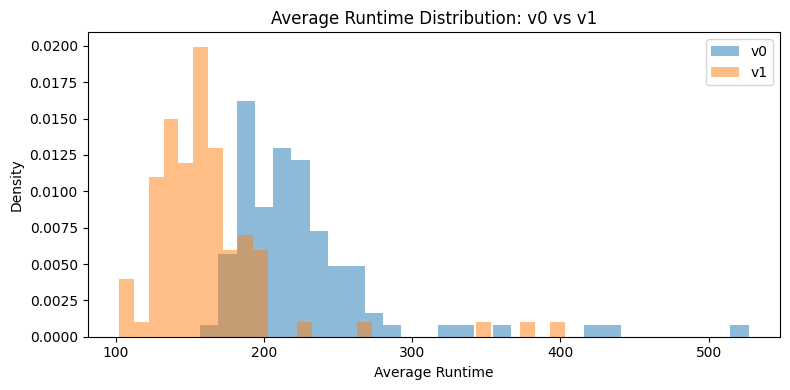

In [16]:
import matplotlib.pyplot as plt

# Assuming df_v0 and df_v1 are already loaded in the environment
plt.figure(figsize=(8, 4))
plt.hist(df_v0['avg_runtime'], bins=30, density=True, alpha=0.5, label='v0')
plt.hist(df_v1['avg_runtime'], bins=30, density=True, alpha=0.5, label='v1')
plt.xlabel('Average Runtime')
plt.ylabel('Density')
plt.title('Average Runtime Distribution: v0 vs v1')
plt.legend()
plt.tight_layout()
plt.show()
